In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
        print(os.path.join(dirname, filename))


/kaggle/input/sbki-mkb/Dataset (1).csv


# LEVEL 1




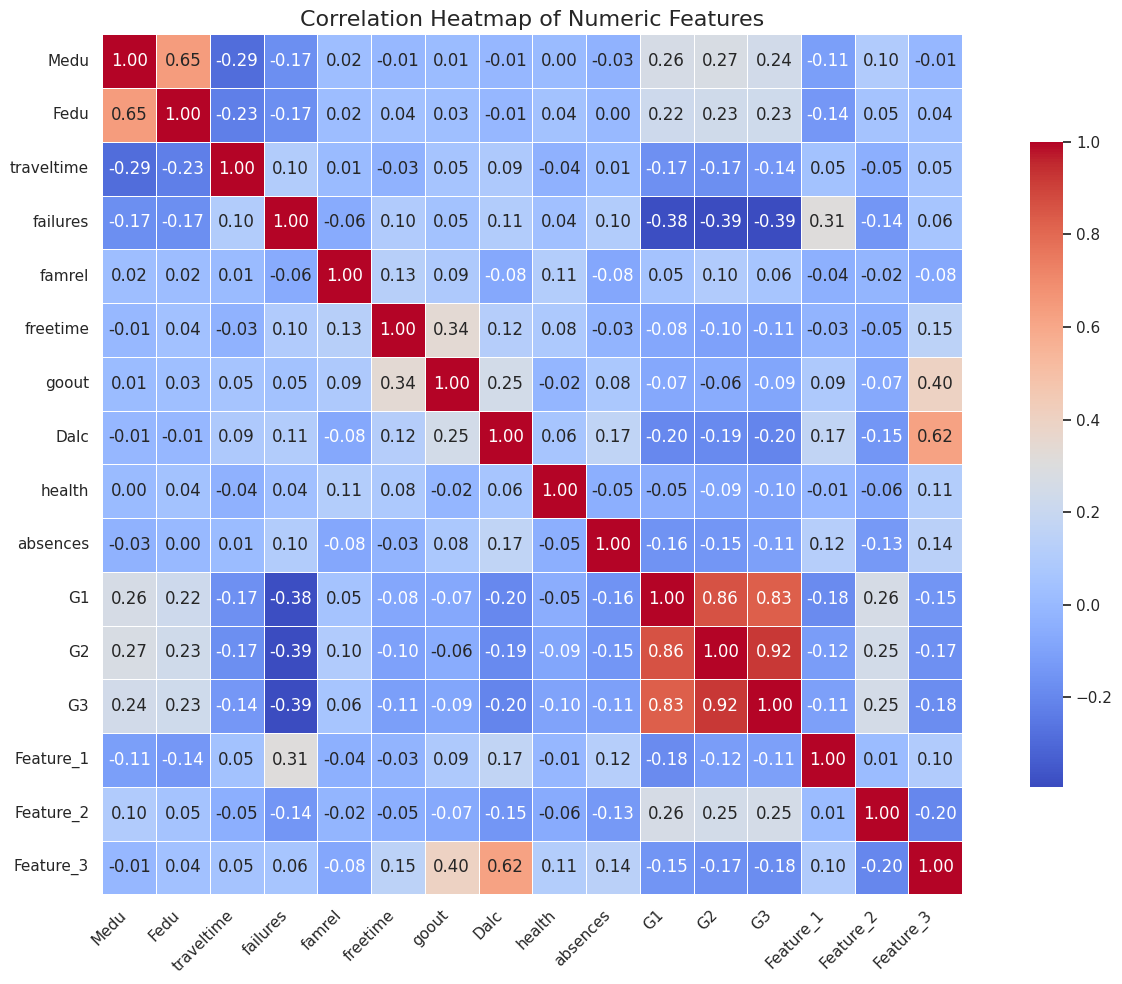

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/kaggle/input/sbki-mkb/Dataset (1).csv")

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": .75})

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


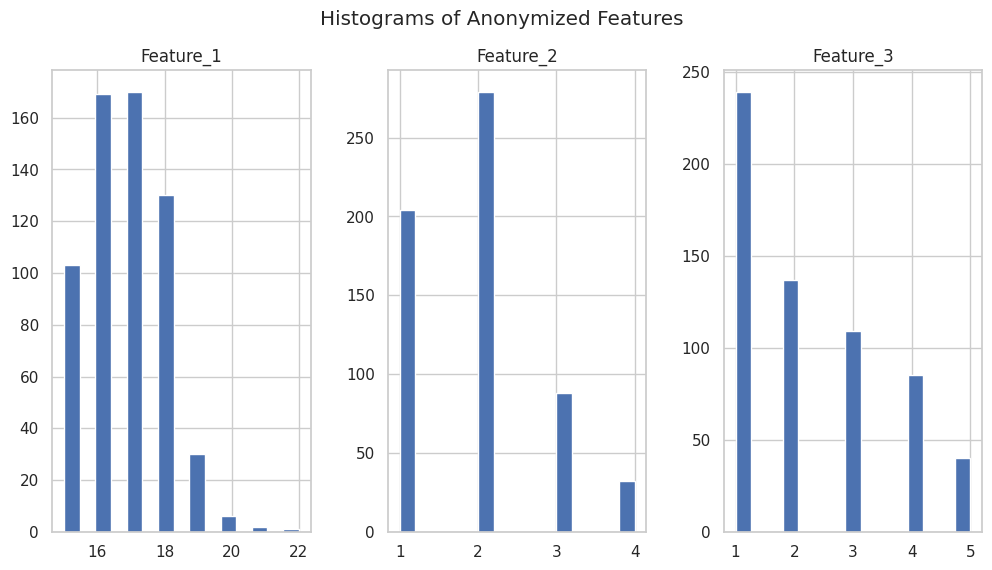

In [71]:
df[['Feature_1', 'Feature_2', 'Feature_3']].hist(bins=15, figsize=(12, 6), layout=(1, 3))
plt.suptitle("Histograms of Anonymized Features")
plt.show()


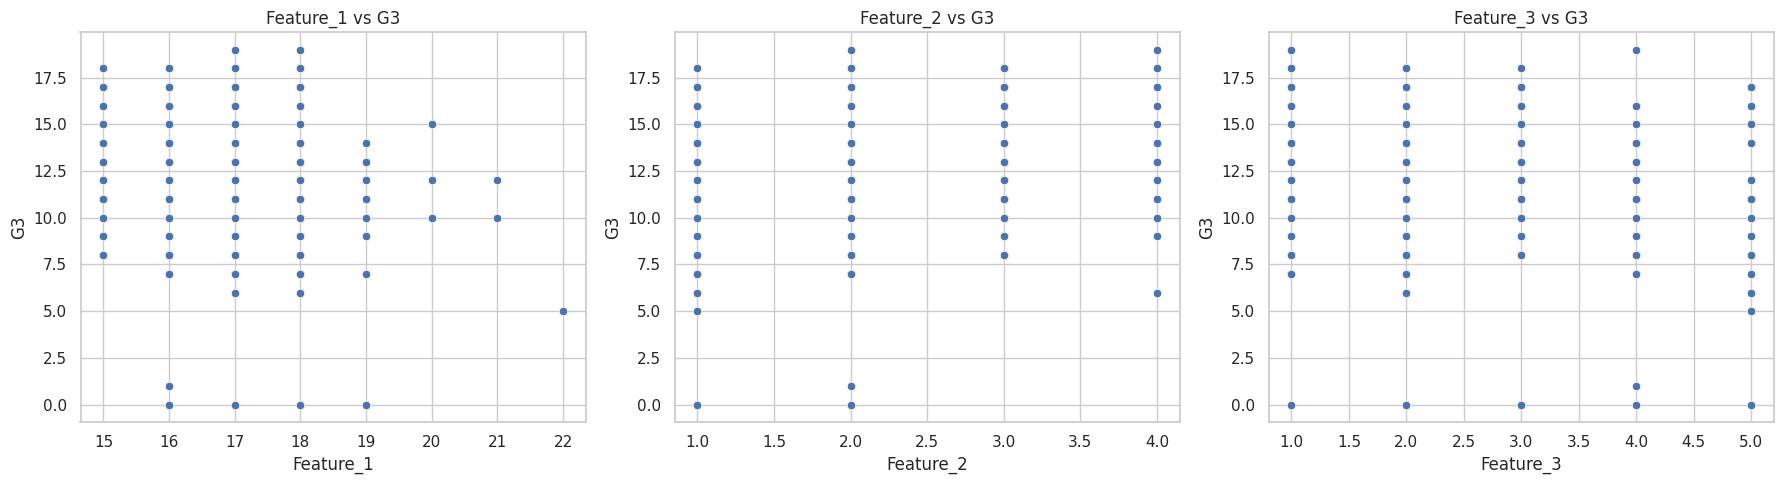

In [72]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3']):
    sns.scatterplot(x=df[feature], y=df['G3'], ax=axes[i])
    axes[i].set_title(f'{feature} vs G3')
plt.tight_layout()
plt.show()


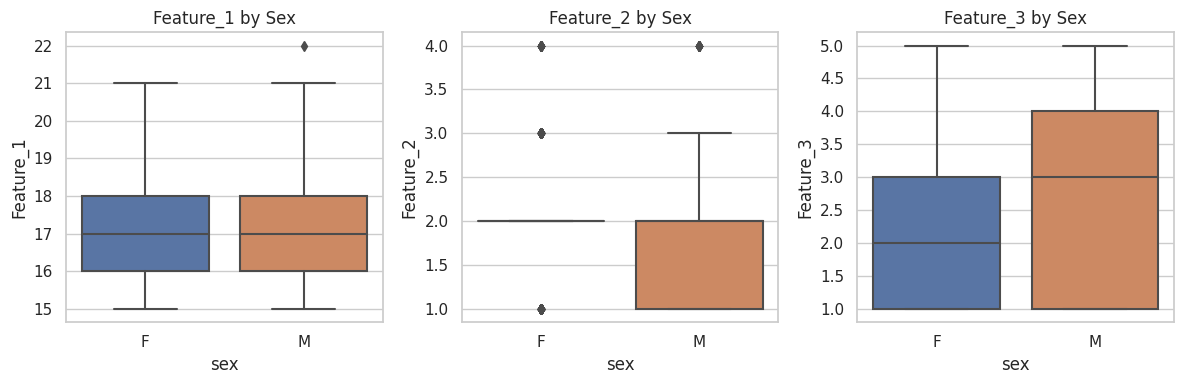

In [73]:
plt.figure(figsize=(12, 4))
for i, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='sex', y=feature)
    plt.title(f"{feature} by Sex")
plt.tight_layout()
plt.show()


# LEVEL 2

In [74]:

missing_info = df.isnull().sum()
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

print("Missing Values in Each Column:")
print(missing_info)


Missing Values in Each Column:
higher        76
Fedu          73
traveltime    73
absences      69
famsize       50
Feature_2     46
freetime      45
Feature_3     39
Feature_1     38
G2            35
dtype: int64


In [75]:
df['higher'] = df['higher'].fillna(df['higher'].mode()[0])
df['famsize'] = df['famsize'].fillna(df['famsize'].mode()[0])

df['Fedu'] = df['Fedu'].fillna(df['Fedu'].median())
df['traveltime'] = df['traveltime'].fillna(df['traveltime'].median())
df['freetime'] = df['freetime'].fillna(df['freetime'].median())

for col in ['absences', 'Feature_1', 'Feature_2', 'Feature_3', 'G2']:
    df[col] = df[col].fillna(df[col].median())


In [76]:

print(df.isnull().sum().sort_values(ascending=False).head(10))


school       0
nursery      0
Feature_3    0
Feature_2    0
Feature_1    0
G3           0
G2           0
G1           0
absences     0
health       0
dtype: int64


# LEVEL 3

**Do female and male students differ in their final grades?**

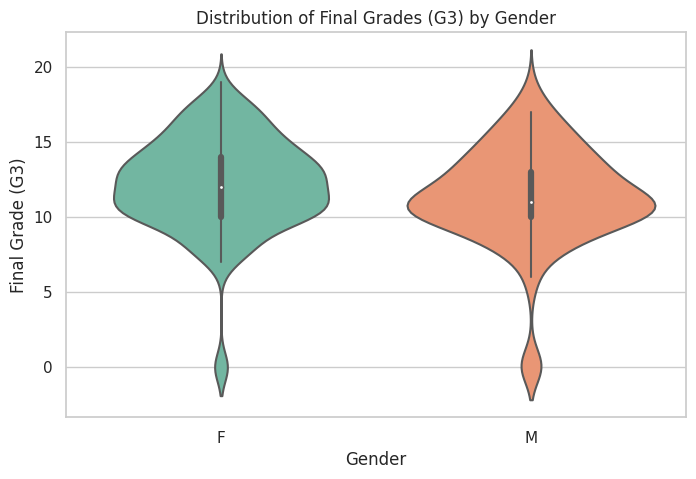

In [77]:

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='sex', y='G3', inner='box', palette='Set2')
plt.title('Distribution of Final Grades (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade (G3)')
plt.show()


**How does mother's education level(medu) impact student performance?**

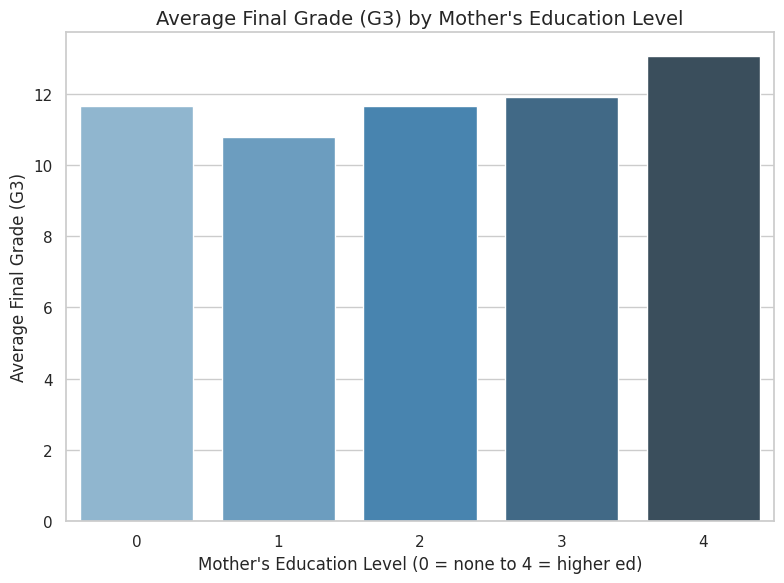

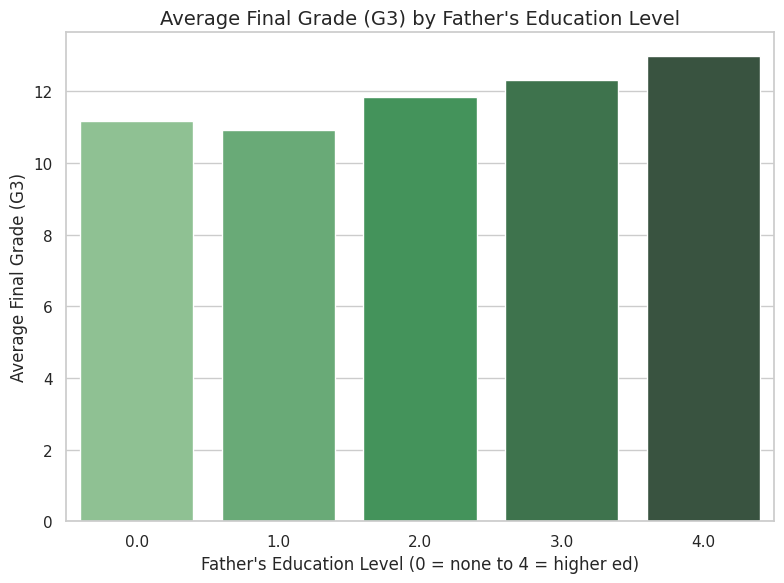

In [78]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Medu', y='G3', palette='Blues_d', errorbar=None)
plt.title("Average Final Grade (G3) by Mother's Education Level", fontsize=14)
plt.xlabel("Mother's Education Level (0 = none to 4 = higher ed)", fontsize=12)
plt.ylabel("Average Final Grade (G3)", fontsize=12)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Fedu', y='G3', palette='Greens_d', errorbar=None)
plt.title("Average Final Grade (G3) by Father's Education Level", fontsize=14)
plt.xlabel("Father's Education Level (0 = none to 4 = higher ed)", fontsize=12)
plt.ylabel("Average Final Grade (G3)", fontsize=12)
plt.tight_layout()
plt.show()


**Does alcohol consumption (Dalc) impact academic performance?**



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



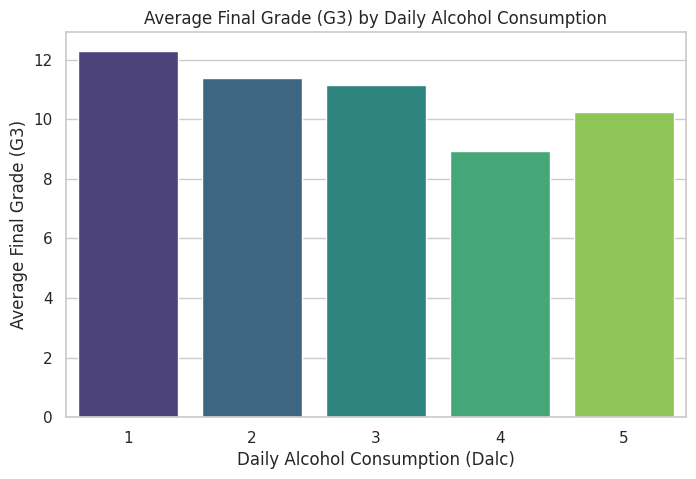

In [79]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Dalc', y='G3', ci=None, palette='viridis')
plt.title('Average Final Grade (G3) by Daily Alcohol Consumption')
plt.xlabel('Daily Alcohol Consumption (Dalc)')
plt.ylabel('Average Final Grade (G3)')
plt.show()


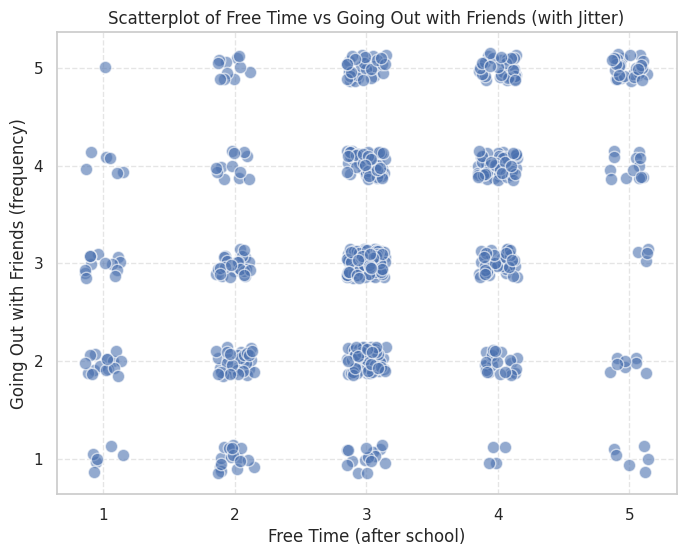

In [80]:

jitter_strength = 0.15
x_jitter = df['freetime'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))
y_jitter = df['goout'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))

plt.figure(figsize=(8,6))
plt.scatter(x_jitter, y_jitter, alpha=0.6, edgecolors='w', s=80)
plt.title('Scatterplot of Free Time vs Going Out with Friends (with Jitter)')
plt.xlabel('Free Time (after school)')
plt.ylabel('Going Out with Friends (frequency)')
plt.xticks([1,2,3,4,5])
plt.yticks([1,2,3,4,5])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Does access to the internet at home affect absences?**

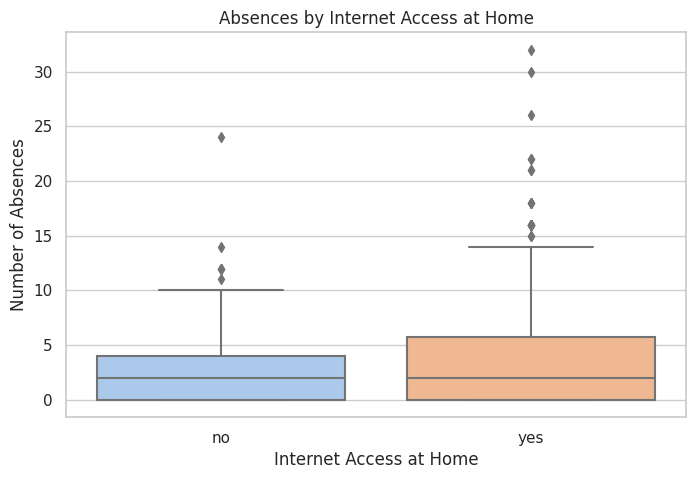

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='internet', y='absences', palette='pastel')
plt.title('Absences by Internet Access at Home')
plt.xlabel('Internet Access at Home')
plt.ylabel('Number of Absences')
plt.show()


# LEVEL 4

**ENSEMBLE VOTING**

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the target
df['romantic'] = LabelEncoder().fit_transform(df['romantic'])

# Feature-target split
X = df.drop(columns=['romantic'])
y = df['romantic']

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Ensemble with soft voting
ensemble_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# Fit and evaluate
ensemble_clf.fit(X_train, y_train)
y_pred = ensemble_clf.predict(X_test)

# Results
print("Ensemble Model Performance:\n")
print(classification_report(y_test, y_pred))


Ensemble Model Performance:

              precision    recall  f1-score   support

           0       0.63      0.72      0.67        81
           1       0.39      0.31      0.34        49

    accuracy                           0.56       130
   macro avg       0.51      0.51      0.51       130
weighted avg       0.54      0.56      0.55       130



**XGBoost**

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the target variable
df['romantic'] = LabelEncoder().fit_transform(df['romantic'])  # Yes → 1, No → 0

# Features and target
X = df.drop(columns=['romantic'])
y = df['romantic']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("XGBoost Performance:\n")
print(classification_report(y_test, y_pred))


XGBoost Performance:

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        81
           1       0.39      0.22      0.29        49

    accuracy                           0.58       130
   macro avg       0.51      0.51      0.49       130
weighted avg       0.54      0.58      0.54       130



**CATBOOST**

In [84]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data
X = df.drop(columns=['romantic'])
y = df['romantic']
cat_features = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=50
)

model.fit(X_train, y_train, cat_features=cat_features)
y_pred = model.predict(X_test)

print("CatBoost Performance:\n")
print(classification_report(y_test, y_pred))


0:	learn: 0.0710660	total: 9.56ms	remaining: 2.86s
50:	learn: 0.7898089	total: 233ms	remaining: 1.14s
100:	learn: 0.9645777	total: 426ms	remaining: 840ms
150:	learn: 0.9893617	total: 609ms	remaining: 601ms
200:	learn: 1.0000000	total: 795ms	remaining: 392ms
250:	learn: 1.0000000	total: 985ms	remaining: 192ms
299:	learn: 1.0000000	total: 1.18s	remaining: 0us
CatBoost Performance:

              precision    recall  f1-score   support

           0       0.65      0.77      0.70        81
           1       0.44      0.31      0.36        49

    accuracy                           0.59       130
   macro avg       0.54      0.54      0.53       130
weighted avg       0.57      0.59      0.57       130



# LEVEL 5

In [85]:
pip uninstall -y scikit-learn shap


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: shap 0.42.1
Uninstalling shap-0.42.1:
  Successfully uninstalled shap-0.42.1
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install scikit-learn==1.2.2 shap==0.42.1


  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached shap-0.42.1-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
Using cached shap-0.42.1-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
Note: you may need to restart th

In [87]:

import sklearn
import shap
import sys
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib


print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)


print("Python version:", sys.version)
print("NumPy version:", np.__version__)


print("sklearn version:",sklearn.__version__)
print("shap version:",shap.__version__)


Pandas version: 2.2.3
Seaborn version: 0.12.2
Matplotlib version: 3.7.2
Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
NumPy version: 1.26.4
sklearn version: 1.2.2
shap version: 0.42.1


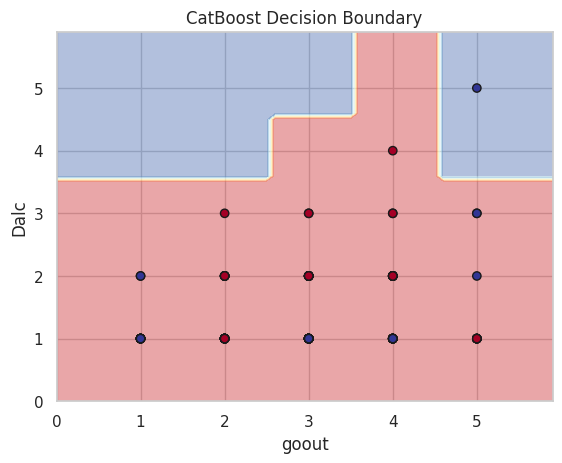

In [88]:

features = ['goout', 'Dalc']
X_two = df[features]
y_two = df['romantic'].astype(int)

X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_two, y_two, test_size=0.2, random_state=42)

# Train CatBoost on 2 features
from catboost import CatBoostClassifier
model_2D = CatBoostClassifier(iterations=300, learning_rate=0.01, depth=4, verbose=0)
model_2D.fit(X_train_2D, y_train_2D)

# Plot decision boundary
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary_catboost(model, X, y, features):
    h = 0.1
    x_min, x_max = X[features[0]].min() - 1, X[features[0]].max() + 1
    y_min, y_max = X[features[1]].min() - 1, X[features[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    grid = pd.DataFrame({features[0]: xx.ravel(), features[1]: yy.ravel()})
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[features[0]], X[features[1]], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title("CatBoost Decision Boundary")
    plt.show()

plot_decision_boundary_catboost(model_2D, X_test_2D, y_test_2D, features)


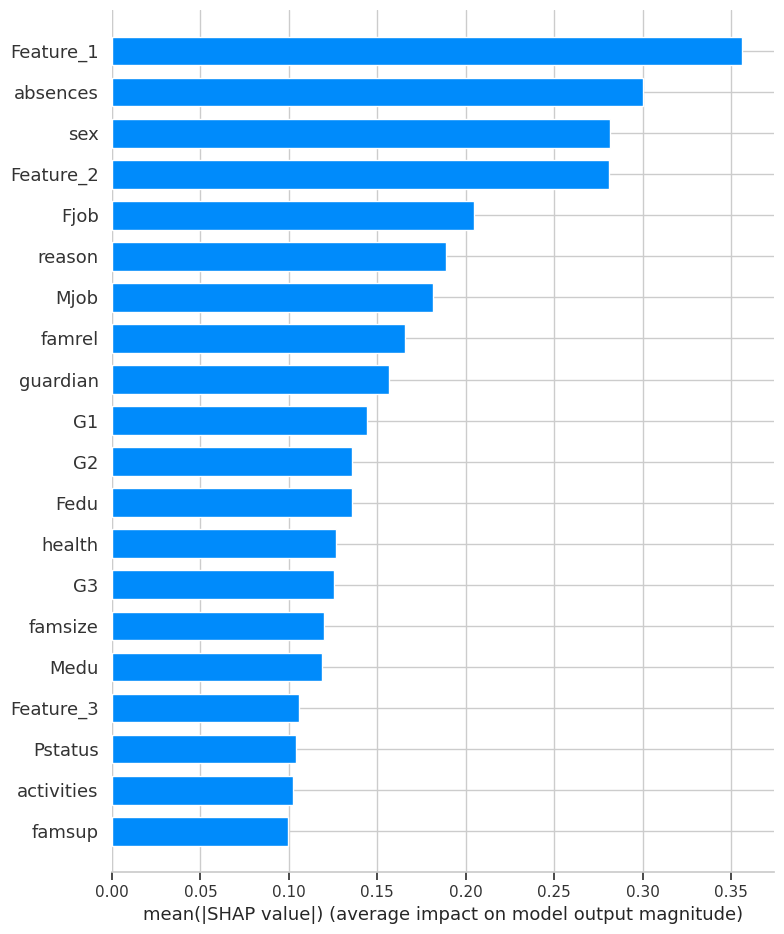

In [89]:
import shap

# SHAP for CatBoost
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Global feature importance plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [90]:
import shap

# Create a copy to get predicted values
X_test_copy = X_test.copy()
X_test_copy['pred'] = model.predict(X_test)

# Get indices of one predicted YES and one predicted NO
yes_index = X_test_copy[X_test_copy['pred'] == 1].index[0]
no_index = X_test_copy[X_test_copy['pred'] == 0].index[0]

# Get the position (iloc) within X_test (not the original DataFrame)
yes_pos = X_test.index.get_loc(yes_index)
no_pos = X_test.index.get_loc(no_index)

# Extract the rows as Series (for plotting)
student_yes = X_test.iloc[yes_pos]
student_no = X_test.iloc[no_pos]

# Initialize SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.initjs()

# Plot YES prediction explanation
shap.force_plot(explainer.expected_value, shap_values[yes_pos], student_yes)


In [91]:
import shap

# Create a copy to get predicted values
X_test_copy = X_test.copy()
X_test_copy['pred'] = model.predict(X_test)

# Get indices of one predicted YES and one predicted NO
yes_index = X_test_copy[X_test_copy['pred'] == 1].index[0]
no_index = X_test_copy[X_test_copy['pred'] == 0].index[0]

# Get the position (iloc) within X_test (not the original DataFrame)
yes_pos = X_test.index.get_loc(yes_index)
no_pos = X_test.index.get_loc(no_index)

# Extract the rows as Series (for plotting)
student_yes = X_test.iloc[yes_pos]
student_no = X_test.iloc[no_pos]

# Initialize SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.initjs()

# Plot NO prediction explanation
shap.force_plot(explainer.expected_value, shap_values[no_pos], student_no)
